<a href="https://colab.research.google.com/github/Miyaputri/Stasiun-Klimatologi-Banten/blob/main/MODEL_REGRESI_LINEAR_BMKG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dan Pre-processing

In [ ]:
install.packages("dplyr")
install.packages("readr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(readr)

file_paths <- c(
  'https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Rata-Rata%20perbulan%202017%20Lengkap.csv',
  'https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Rata-Rata%20perbulan%202018%20Lengkap.csv',
  'https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Rata-Rata%20perbulan%202019%20lengkap.csv',
  'https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Rata-Rata%20perbulan%202020%20lengkap.csv',
  'https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Rata-Rata%20perbulan%202021%20lengkap.csv',
  'https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Rata-Rata%20perbulan%202022%20Lengkap.csv',
  'https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Rata-Rata%20perbulan%202023%20Lengkap.csv',
  'https://raw.githubusercontent.com/Miyaputri/Stasiun-Klimatologi-Banten/refs/heads/main/Stasiun%20Klimatologi%20Banten%20-%20Rata-Rata%20perbulan%202024%20Lengkap.csv'
)

# Membaca semua file CSV
data_list <- lapply(file_paths, read.csv)

# Menggabungkan semua data menjadi satu
df <- bind_rows(data_list)

head(df)

,BULAN,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,TAHUN
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,23.42857,31.20000,26.13333,86.66667,11.375000,3.433333,5.000000,248.5714,5.571429,2017
2,2,23.75000,30.91429,26.58571,86.42857,18.604762,3.210714,4.222222,239.4286,4.740741,2017
3,3,24.36667,32.47857,27.30741,83.29630,22.550000,4.338710,3.709677,227.4194,1.903226,2017
4,4,23.93103,32.67857,27.50667,81.73333,14.603846,4.190000,3.965517,181.5333,3.551724,2017
5,5,24.76667,33.20000,28.20000,80.25806,11.028571,4.058065,3.129032,136.4516,3.225806,2017
6,6,24.55556,33.00417,27.85000,78.76667,8.223077,4.720690,3.400000,114.6667,3.500000,2017


In [ ]:
df

BULAN,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,TAHUN
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,23.42857,31.20000,26.13333,86.66667,11.375000,3.433333,5.000000,248.57143,5.571429,2017
2,23.75000,30.91429,26.58571,86.42857,18.604762,3.210714,4.222222,239.42857,4.740741,2017
3,24.36667,32.47857,27.30741,83.29630,22.550000,4.338710,3.709677,227.41935,1.903226,2017
4,23.93103,32.67857,27.50667,81.73333,14.603846,4.190000,3.965517,181.53333,3.551724,2017
5,24.76667,33.20000,28.20000,80.25806,11.028571,4.058065,3.129032,136.45161,3.225806,2017
6,24.55556,33.00417,27.85000,78.76667,8.223077,4.720690,3.400000,114.66667,3.500000,2017
7,24.12903,32.94194,27.75484,77.22581,13.010000,4.412903,3.161290,136.00000,3.645161,2017
8,24.12903,33.60000,28.18387,70.00000,3.160000,5.235484,3.870968,127.41935,4.709677,2017
9,24.23333,33.68000,28.30000,73.30000,19.254545,5.613333,3.466667,135.66667,4.233333,2017


In [ ]:
df <- df %>%
  mutate(
    BULAN = as.integer(BULAN),     # Ubah BULAN jadi integer
    TAHUN = as.integer(TAHUN),     # Ubah TAHUN jadi integer
    TN = as.numeric(TN),           # Suhu minimum
    TX = as.numeric(TX),           # Suhu maksimum
    TAVG = as.numeric(TAVG),       # Suhu rata-rata
    RH_AVG = as.numeric(RH_AVG),   # Kelembapan rata-rata
    RR = as.numeric(RR),           # Curah hujan
    SS = as.numeric(SS),           # Lama penyinaran matahari
    FF_X = as.numeric(FF_X),       # Kecepatan angin maksimum
    DDD_X = as.numeric(DDD_X),     # Arah angin maksimum
    FF_AVG = as.numeric(FF_AVG)    # Kecepatan angin rata-rata
  )

In [ ]:
str(df)

'data.frame':	96 obs. of  11 variables:
 $ BULAN : int  1 2 3 4 5 6 7 8 9 10 ...
 $ TN    : num  23.4 23.8 24.4 23.9 24.8 ...
 $ TX    : num  31.2 30.9 32.5 32.7 33.2 ...
 $ TAVG  : num  26.1 26.6 27.3 27.5 28.2 ...
 $ RH_AVG: num  86.7 86.4 83.3 81.7 80.3 ...
 $ RR    : num  11.4 18.6 22.6 14.6 11 ...
 $ SS    : num  3.43 3.21 4.34 4.19 4.06 ...
 $ FF_X  : num  5 4.22 3.71 3.97 3.13 ...
 $ DDD_X : num  249 239 227 182 136 ...
 $ FF_AVG: num  5.57 4.74 1.9 3.55 3.23 ...
 $ TAHUN : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...


In [ ]:
summary(df)

     BULAN             TN              TX             TAVG      
 Min.   : 1.00   Min.   :23.37   Min.   :30.31   Min.   :26.13  
 1st Qu.: 3.75   1st Qu.:24.28   1st Qu.:32.20   1st Qu.:27.56  
 Median : 6.50   Median :24.55   Median :32.93   Median :28.11  
 Mean   : 6.50   Mean   :24.65   Mean   :32.84   Mean   :28.18  
 3rd Qu.: 9.25   3rd Qu.:24.90   3rd Qu.:33.36   3rd Qu.:28.61  
 Max.   :12.00   Max.   :26.45   Max.   :36.00   Max.   :31.07  
     RH_AVG            RR               SS             FF_X      
 Min.   :65.33   Min.   : 0.000   Min.   :2.232   Min.   :3.032  
 1st Qu.:75.83   1st Qu.: 7.977   1st Qu.:3.903   1st Qu.:3.467  
 Median :80.36   Median :11.588   Median :4.636   Median :3.774  
 Mean   :79.19   Mean   :11.839   Mean   :4.832   Mean   :3.819  
 3rd Qu.:82.92   3rd Qu.:15.857   3rd Qu.:5.761   3rd Qu.:4.081  
 Max.   :88.89   Max.   :33.800   Max.   :8.261   Max.   :5.000  
     DDD_X            FF_AVG           TAHUN     
 Min.   : 80.32   Min.   :0.7667 

In [ ]:
colSums(is.na(df))  # Jumlah nilai yang hilang di tiap kolom

BULAN     TN     TX   TAVG RH_AVG     RR     SS   FF_X  DDD_X FF_AVG  TAHUN 
     0      0      0      0      0      0      0      0      0      0      0

In [ ]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
library(psych)
describe(df)  # Statistik deskriptif lengkap

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BULAN,1,96,6.500000,3.4701737,6.500000,6.500000,4.4478000,1.0000000,12.000000,11.000000,0.00000000,-1.2537401,0.35417312
TN,2,96,24.646020,0.5885765,24.551971,24.614184,0.4793740,23.3666667,26.448387,3.081720,0.53645154,0.2704156,0.06007134
TX,3,96,32.835402,1.0506902,32.932688,32.842168,0.9670595,30.3068966,36.003333,5.696437,0.05280927,0.2899042,0.10723562
TAVG,4,96,28.184842,0.9476770,28.109509,28.110846,0.8175714,26.1333333,31.070968,4.937634,0.77014236,0.8067734,0.09672188
RH_AVG,5,96,79.189488,5.4732540,80.359677,79.549897,5.2220656,65.3333333,88.892857,23.559524,-0.57238577,-0.5016702,0.55861165
RR,6,96,11.838643,6.1936414,11.587500,11.679876,6.0588920,0.0000000,33.800000,33.800000,0.41036885,0.3832427,0.63213588
SS,7,96,4.831521,1.3350499,4.636151,4.769171,1.2374625,2.2322581,8.261290,6.029032,0.40829196,-0.3441390,0.13625796
FF_X,8,96,3.819003,0.4779169,3.774194,3.789607,0.4559394,3.0322581,5.000000,1.967742,0.49029122,-0.4405812,0.04877718
DDD_X,9,96,165.872723,55.6867897,153.290323,164.266155,65.9139250,80.3225806,264.642857,184.320276,0.28182650,-1.3229836,5.68350918


In [ ]:
# Standarisasi data numerik (kecuali BULAN dan TAHUN)
dfs <- df %>%
  mutate(across(c(TN, TX, TAVG, RH_AVG, RR, SS, FF_X, FF_AVG), scale))

# Cek data setelah standarisasi
head(dfs)

,BULAN,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,TAHUN
,<int>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<dbl>,"<dbl[,1]>",<int>
1,1,-2.0684626,-1.5565028,-2.16477604,1.36613038,-0.07485797,-1.0472924,2.4711354,248.5714,2.7415042,2017
2,2,-1.5223508,-1.8284329,-1.68741831,1.32262879,1.09242981,-1.2140420,0.8437021,239.4286,2.0616534,2017
3,3,-0.4746252,-0.3396156,-0.92587920,0.75034124,1.72941182,-0.3691332,-0.2287539,227.4194,-0.2606230,2017
4,4,-1.2147706,-0.1492645,-0.71561848,0.46477749,0.44645832,-0.4805221,0.3065690,181.5333,1.0885395,2017
5,5,0.2049806,0.3470079,0.01599505,0.19523604,-0.13079091,-0.5793464,-1.4437041,136.4516,0.8218023,2017
6,6,-0.1537002,0.1606224,-0.35332909,-0.07725229,-0.58375457,-0.0830166,-0.8767273,114.6667,1.0462075,2017


In [ ]:
# Transformasi variabel melingkar (DDD_X) menjadi sine dan cosine
data_transformed <- dfs %>%
  mutate(
    DDD_X_sin = sin(DDD_X * pi / 180),  # Mengubah derajat ke radian untuk sine
    DDD_X_cos = cos(DDD_X * pi / 180)   # Mengubah derajat ke radian untuk cosine
  )

In [ ]:
install.packages('ggplot2') # Corrected function name to install.packages
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




## Asumsi model

In [ ]:
# Membuat asumsi model regresi linier untuk DDD_x_sin dan DDD_x_cos
model <- lm(cbind(DDD_X_cos, DDD_X_sin) ~ TN + TX + TAVG + RH_AVG + RR + SS + FF_X + FF_AVG, data = data_transformed)

# Melihat hasil model
summary(model)

Response DDD_X_cos :

Call:
lm(formula = DDD_X_cos ~ TN + TX + TAVG + RH_AVG + RR + SS + 
    FF_X + FF_AVG, data = data_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58732 -0.23870 -0.03555  0.19220  0.83830 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.564256   0.031044 -18.176   <2e-16 ***
TN           0.113037   0.048850   2.314   0.0230 *  
TX          -0.165386   0.083001  -1.993   0.0494 *  
TAVG         0.008379   0.068906   0.122   0.9035    
RH_AVG       0.012959   0.068027   0.190   0.8494    
RR          -0.032779   0.035644  -0.920   0.3603    
SS           0.166296   0.073097   2.275   0.0254 *  
FF_X         0.075217   0.033852   2.222   0.0289 *  
FF_AVG       0.029990   0.048740   0.615   0.5400    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3042 on 87 degrees of freedom
Multiple R-squared:  0.1528,	Adjusted R-squared:  0.07488 
F-statistic: 1.961 on 8

In [ ]:
# Membuat asumsi model regresi linier untuk DDD_x_sin dan DDD_x_cos
model <- lm(cbind(DDD_X_cos, DDD_X_sin) ~ TN + TX + SS + FF_X, data = data_transformed)

# Melihat hasil model
summary(model)

Response DDD_X_cos :

Call:
lm(formula = DDD_X_cos ~ TN + TX + SS + FF_X, data = data_transformed)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5868 -0.2262 -0.0342  0.1963  0.8195 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.56426    0.03060 -18.437  < 2e-16 ***
TN           0.10239    0.03963   2.583  0.01138 *  
TX          -0.13985    0.05987  -2.336  0.02169 *  
SS           0.14959    0.05267   2.840  0.00557 ** 
FF_X         0.07943    0.03160   2.514  0.01371 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2999 on 91 degrees of freedom
Multiple R-squared:  0.1388,	Adjusted R-squared:  0.1009 
F-statistic: 3.666 on 4 and 91 DF,  p-value: 0.008158


Response DDD_X_sin :

Call:
lm(formula = DDD_X_sin ~ TN + TX + SS + FF_X, data = data_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15115 -0.24877  0.04002  0.29164  0.81986 

Coefficients:
            Estim

## Model Cos

In [ ]:
# Membuat model regresi linier untuk DDD_x_sin dan DDD_x_cos
model_cos <- lm(DDD_X_cos ~ TN + TX + SS + FF_X, data = data_transformed)

# Melihat hasil model
summary(model_cos)


Call:
lm(formula = DDD_X_cos ~ TN + TX + SS + FF_X, data = data_transformed)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5868 -0.2262 -0.0342  0.1963  0.8195 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.56426    0.03060 -18.437  < 2e-16 ***
TN           0.10239    0.03963   2.583  0.01138 *  
TX          -0.13985    0.05987  -2.336  0.02169 *  
SS           0.14959    0.05267   2.840  0.00557 ** 
FF_X         0.07943    0.03160   2.514  0.01371 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2999 on 91 degrees of freedom
Multiple R-squared:  0.1388,	Adjusted R-squared:  0.1009 
F-statistic: 3.666 on 4 and 91 DF,  p-value: 0.008158


In [ ]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode




In [ ]:
Vif_model_cos <- vif(model_cos)
vif_table_cos <- as.data.frame(Vif_model_cos)
vif_table_cos

,Vif_model_cos
,<dbl>
TN,1.659668
TX,3.786753
SS,2.931633
FF_X,1.055082


In [ ]:
model_cos.step <- step(model_cos, direction = "backward", trace = TRUE)

Start:  AIC=-226.39
DDD_X_cos ~ TN + TX + SS + FF_X

       Df Sum of Sq    RSS     AIC
<none>              8.1821 -226.39
- TX    1   0.49065 8.6727 -222.80
- FF_X  1   0.56809 8.7502 -221.95
- TN    1   0.60010 8.7822 -221.60
- SS    1   0.72517 8.9072 -220.24


### Uji Asumsi

In [ ]:
anova(model_cos)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TN,1,0.20089490,0.20089490,2.2343317,0.13843473
TX,1,0.01191747,0.01191747,0.1325449,0.71665245
SS,1,0.53773580,0.53773580,5.9806403,0.01638807
FF_X,1,0.56809327,0.56809327,6.3182729,0.01370852
Residuals,91,8.18205999,0.08991275,NA,NA



	Shapiro-Wilk normality test

data:  residuals_cos
W = 0.97763, p-value = 0.09971


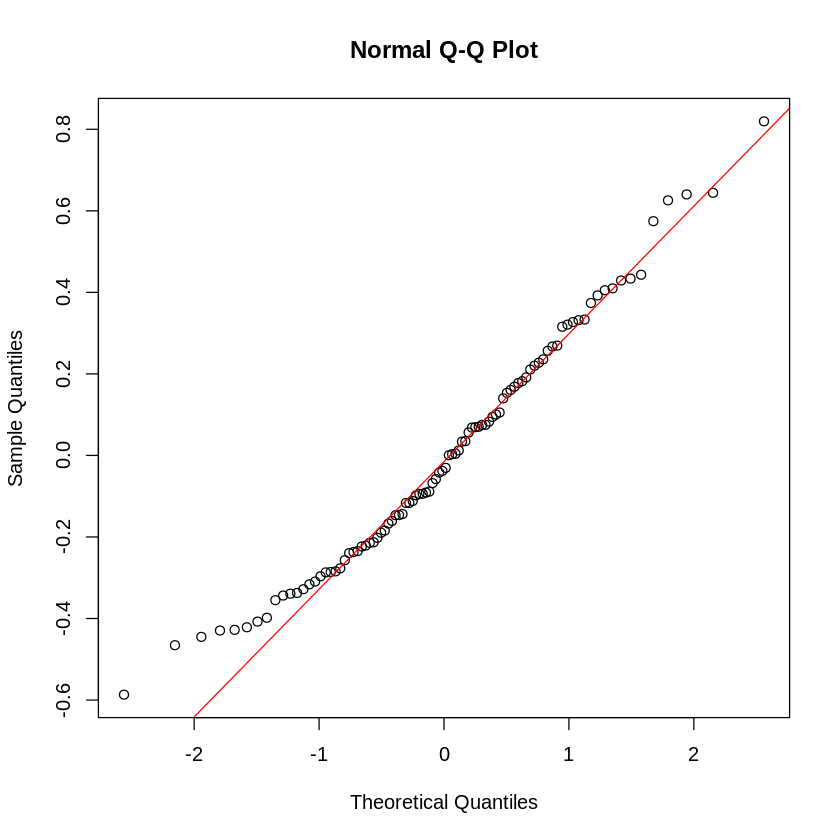

In [ ]:
# Mengambil residual dari model
residuals_cos <- residuals(model_cos)

# Uji normalitas menggunakan Shapiro-Wilk test
shapiro.test(residuals_cos)

# Visualisasi menggunakan QQ plot
qqnorm(residuals_cos)
qqline(residuals_cos, col = "red")

In [ ]:
install.packages('lmtest')
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
install.packages("ggplot2")
library(ggplot2)


	studentized Breusch-Pagan test

data:  model_cos
BP = 5.5778, df = 4, p-value = 0.233


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`geom_smooth()` using formula = 'y ~ x'


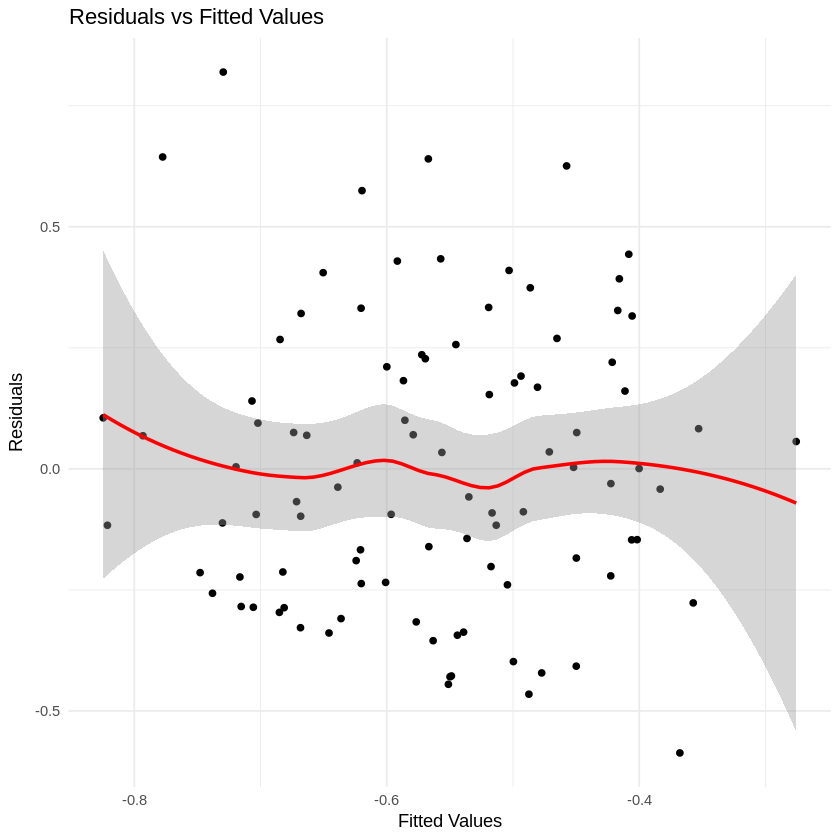

In [ ]:
# Uji Breusch-Pagan untuk homoskedastisitas
bptest(model_cos)

# Visualisasi Residuals vs Fitted Values untuk homoskedastisitas
ggplot(data = data.frame(fitted = fitted(model_cos), residuals = residuals(model_cos)), aes(x = fitted, y = residuals)) +
  geom_point() +
  geom_smooth(method = "loess", color = "red") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()


In [ ]:
dwtest(model_cos)


	Durbin-Watson test

data:  model_cos
DW = 1.7855, p-value = 0.0936
alternative hypothesis: true autocorrelation is greater than 0


## Model sin

### Model sin

In [ ]:
# Membuat model regresi linier untuk DDD_x_sin dan DDD_x_cos
model_sin <- lm(DDD_X_sin ~ TX + SS + FF_X, data = data_transformed)

# Melihat hasil model
summary(model_sin)


Call:
lm(formula = DDD_X_sin ~ TX + SS + FF_X, data = data_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21236 -0.25665  0.04845  0.27572  0.79731 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17996    0.03977   4.525 1.80e-05 ***
TX           0.35430    0.06127   5.783 1.00e-07 ***
SS           0.19182    0.06193   3.098  0.00259 ** 
FF_X        -0.29666    0.04089  -7.256 1.23e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3897 on 92 degrees of freedom
Multiple R-squared:  0.7355,	Adjusted R-squared:  0.7269 
F-statistic: 85.28 on 3 and 92 DF,  p-value: < 2.2e-16


In [ ]:
Vif_model_sin <- vif(model_sin)
vif_table_sin <- as.data.frame(Vif_model_sin)
vif_table_sin

,Vif_model_sin
,<dbl>
TX,2.348212
SS,2.398915
FF_X,1.045776


In [ ]:
model_sin.step <- step(model_sin, direction = "backward", trace = TRUE)

Start:  AIC=-177.02
DDD_X_sin ~ TX + SS + FF_X

       Df Sum of Sq    RSS     AIC
<none>              13.971 -177.03
- SS    1    1.4571 15.428 -169.50
- TX    1    5.0783 19.050 -149.26
- FF_X  1    7.9947 21.966 -135.59


### Uji asumsi


	Shapiro-Wilk normality test

data:  residuals_sin
W = 0.98395, p-value = 0.2919


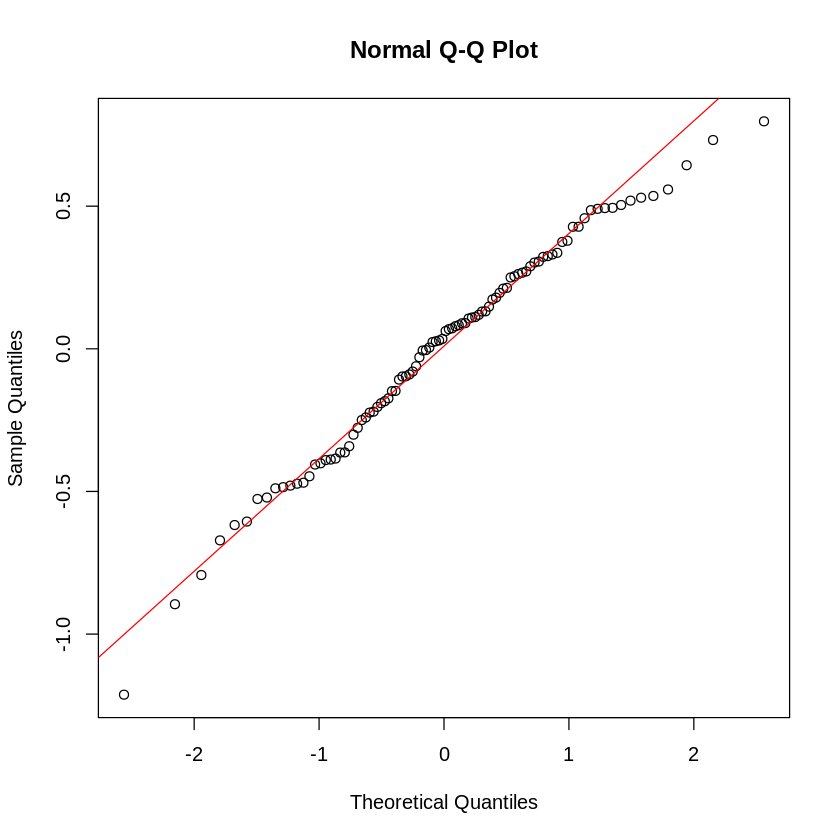

In [ ]:
# Mengambil residual dari model
residuals_sin <- residuals(model_sin)

# Uji normalitas menggunakan Shapiro-Wilk test
shapiro.test(residuals_sin)

# Visualisasi menggunakan QQ plot
qqnorm(residuals_sin)
qqline(residuals_sin, col = "red")

In [ ]:
# Uji Breusch-Pagan untuk homoskedastisitas
bptest(model_sin)


	studentized Breusch-Pagan test

data:  model_sin
BP = 3.4821, df = 3, p-value = 0.3231


In [ ]:
dwtest(model_sin)


	Durbin-Watson test

data:  model_sin
DW = 1.3492, p-value = 0.0002566
alternative hypothesis: true autocorrelation is greater than 0


### Mengatasi Autokorelasi

In [ ]:
model_sin_lag <- lm(DDD_X_sin ~ TX + SS + FF_X + lag(DDD_X_sin, 1), data = data_transformed)
summary(model_sin_lag)


Call:
lm(formula = DDD_X_sin ~ TX + SS + FF_X + lag(DDD_X_sin, 1), 
    data = data_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19832 -0.25673  0.00725  0.26542  0.76370 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.11817    0.03811   3.101 0.002575 ** 
TX                 0.23925    0.06160   3.884 0.000196 ***
SS                 0.15854    0.05629   2.816 0.005969 ** 
FF_X              -0.24425    0.04029  -6.062 3.10e-08 ***
lag(DDD_X_sin, 1)  0.32003    0.06841   4.678 1.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3514 on 90 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7845,	Adjusted R-squared:  0.7749 
F-statistic: 81.92 on 4 and 90 DF,  p-value: < 2.2e-16


In [ ]:
model_sin_lag2 <- lm(DDD_X_sin ~ TX + SS + FF_X + lag(DDD_X_sin, 1) + lag(DDD_X_sin, 2), data = data_transformed)
summary(model_sin_lag2)


Call:
lm(formula = DDD_X_sin ~ TX + SS + FF_X + lag(DDD_X_sin, 1) + 
    lag(DDD_X_sin, 2), data = data_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02003 -0.22244  0.01655  0.20840  0.65299 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.11859    0.03583   3.310 0.001354 ** 
TX                 0.20975    0.05864   3.577 0.000568 ***
SS                 0.15487    0.05264   2.942 0.004167 ** 
FF_X              -0.19348    0.04005  -4.831 5.70e-06 ***
lag(DDD_X_sin, 1)  0.60097    0.09672   6.213 1.68e-08 ***
lag(DDD_X_sin, 2) -0.29405    0.07619  -3.859 0.000216 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3283 on 88 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8121,	Adjusted R-squared:  0.8014 
F-statistic: 76.04 on 5 and 88 DF,  p-value: < 2.2e-16


In [ ]:
Vif_model_sin_lag2 <- vif(model_sin_lag2)
vif_table_sin_lag2 <- as.data.frame(Vif_model_sin_lag2)
vif_table_sin_lag2

,Vif_model_sin_lag2
,<dbl>
TX,2.843562
SS,2.375277
FF_X,1.310773
"lag(DDD_X_sin, 1)",4.359597
"lag(DDD_X_sin, 2)",2.773889


In [ ]:
anova(model_sin_lag2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TX,1,25.889137,25.8891366,240.23192,6.914668e-27
SS,1,2.706022,2.7060220,25.10987,2.773096e-06
FF_X,1,8.060474,8.0604739,74.79520,2.171948e-13
"lag(DDD_X_sin, 1)",1,2.714417,2.7144169,25.18777,2.687389e-06
"lag(DDD_X_sin, 2)",1,1.605159,1.6051587,14.89468,2.163425e-04
Residuals,88,9.483519,0.1077673,NA,NA



	Shapiro-Wilk normality test

data:  residuals_sin_lag2
W = 0.98414, p-value = 0.315


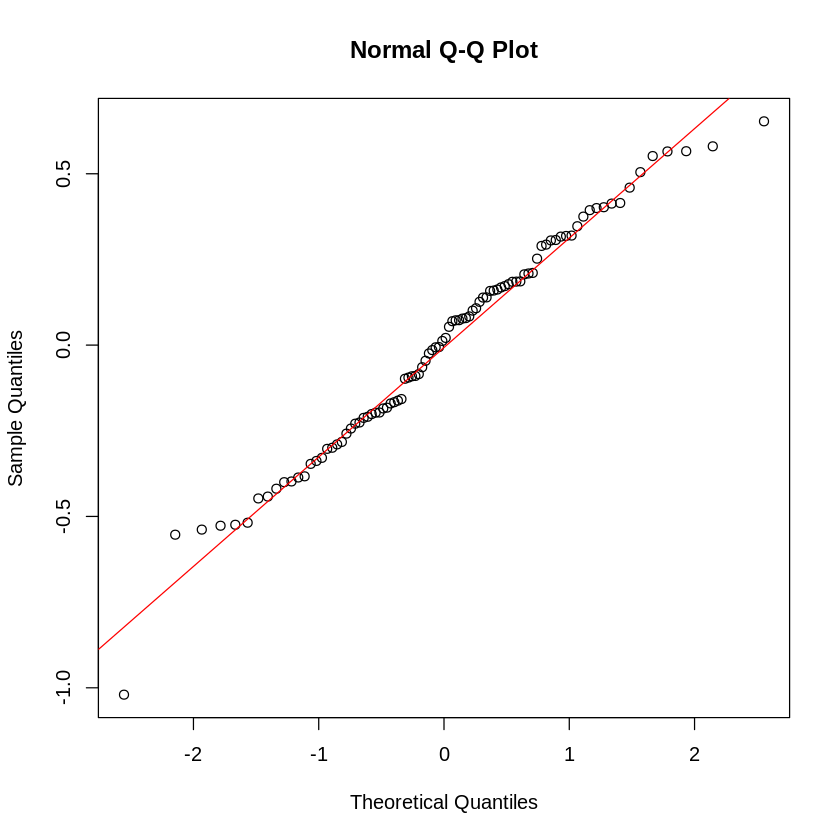

In [ ]:
# Mengambil residual dari model
residuals_sin_lag2 <- residuals(model_sin_lag2)

# Uji normalitas menggunakan Shapiro-Wilk test
shapiro.test(residuals_sin_lag2)

# Visualisasi menggunakan QQ plot
qqnorm(residuals_sin_lag2)
qqline(residuals_sin_lag2, col = "red")

In [ ]:
# Uji Breusch-Pagan untuk homoskedastisitas
bptest(model_sin_lag2)


	studentized Breusch-Pagan test

data:  model_sin_lag2
BP = 8.5165, df = 5, p-value = 0.13


In [ ]:
dwtest(model_sin_lag2)


	Durbin-Watson test

data:  model_sin_lag2
DW = 2.1199, p-value = 0.6186
alternative hypothesis: true autocorrelation is greater than 0


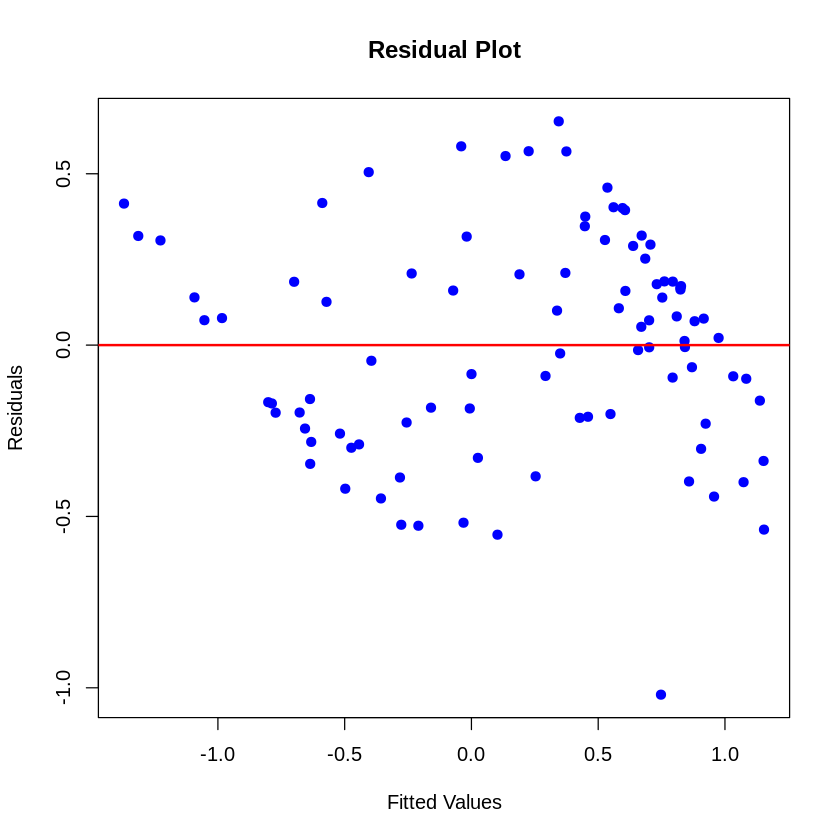

In [ ]:
# Residual plot
plot(fitted(model_sin_lag2), residuals(model_sin_lag2),
     main = "Residual Plot",
     xlab = "Fitted Values",
     ylab = "Residuals",
     pch = 19, col = "blue")
abline(h = 0, col = "red", lwd = 2) # Garis nol untuk referensi

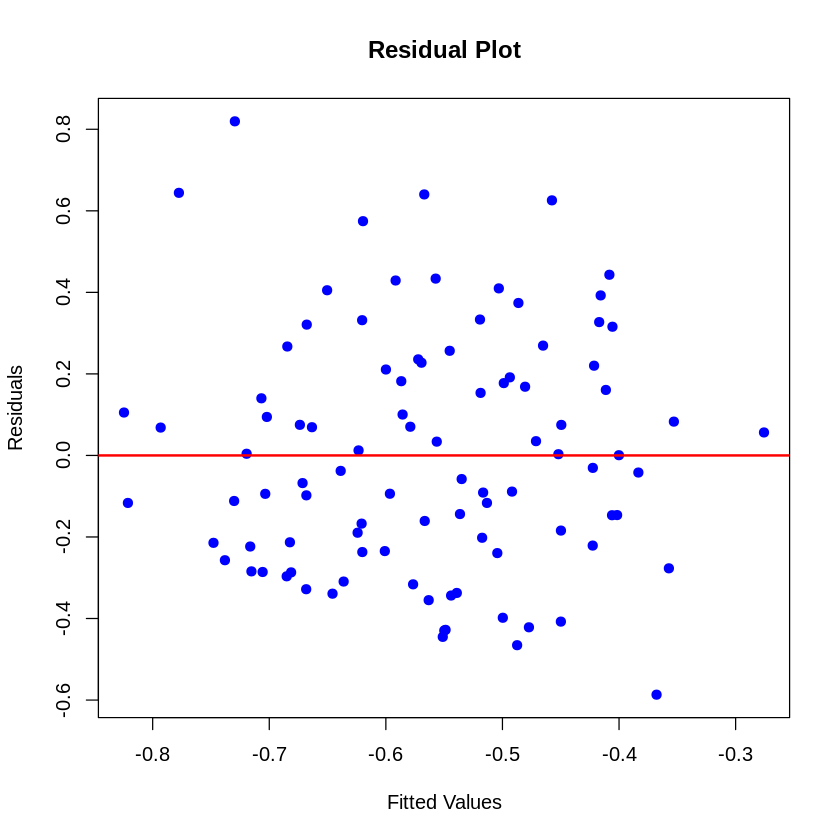

In [ ]:
# Residual plot
plot(fitted(model_cos), residuals(model_cos),
     main = "Residual Plot",
     xlab = "Fitted Values",
     ylab = "Residuals",
     pch = 19, col = "blue")
abline(h = 0, col = "red", lwd = 2) # Garis nol untuk referensi